# Case Study on Ensemble Learning

 - In this case study, we apply ensemble learning techniques to a real-world loan dataset to predict loan approval status (loan_status).

 - Dataset Overview:
The dataset consists of 13 columns capturing demographic, financial, and credit-related information about loan applicants:

     - Loan_ID: Unique identifier for each loan application

     - Gender: Applicant's gender

     - Married: Marital status

     - Dependents: Number of dependents

     - Education: Educational background (Graduate/Not Graduate)

     - Self_Employed: Employment type (Self-employed or not)

     - ApplicantIncome: Income of the applicant

     - CoapplicantIncome: Income of the co-applicant

     - LoanAmount: Loan amount requested

     - Loan_Amount_Term: Term of the loan (in months)

     - Credit_History: Record of past credit performance (1 = good, 0 = poor)

     - Property_Area: Area of the property (Urban/Semiurban/Rural)

     - Loan_Status: Target variable indicating whether the loan was approved (Y) or not (N)


 - Objective:
The objective is to build classification models that can accurately predict Loan_Status using ensemble learning approaches, which combine the strengths of multiple learners to improve predictive performance.


- Methods Explored:

  To improve predictive accuracy and robustness, we explore multiple ensemble methods across both bagging and boosting paradigms:

    - Bagging methods like Random Forest and BaggingClassifier, which aim to reduce variance by training multiple base learners on different subsets of the data.

    - Boosting methods such as AdaBoost, Gradient Boosting, XGBoost, and LightGBM, which sequentially build models that focus on the errors of previous ones to reduce bias and improve performance.

    - Stacking, a powerful meta-learning approach that combines the strengths of multiple diverse models using a secondary learner.

  Each model is evaluated using cross-validation to ensure generalizability, with metrics such as accuracy and standard deviation used to compare performance.

In [2]:

#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

#reading the dataset
df = pd.read_csv("/content/sample_data/train_loan (1).csv")

In [4]:

#return first five rows of dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
#get columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:

#checking for basic details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:

#checking for number of null values in each column
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:

#statistical deccription of number type columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:

#statistical deccription of object type columns
df.select_dtypes(include='object').describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:

#checking for duplicates
df.duplicated().sum()

np.int64(0)

# EDA

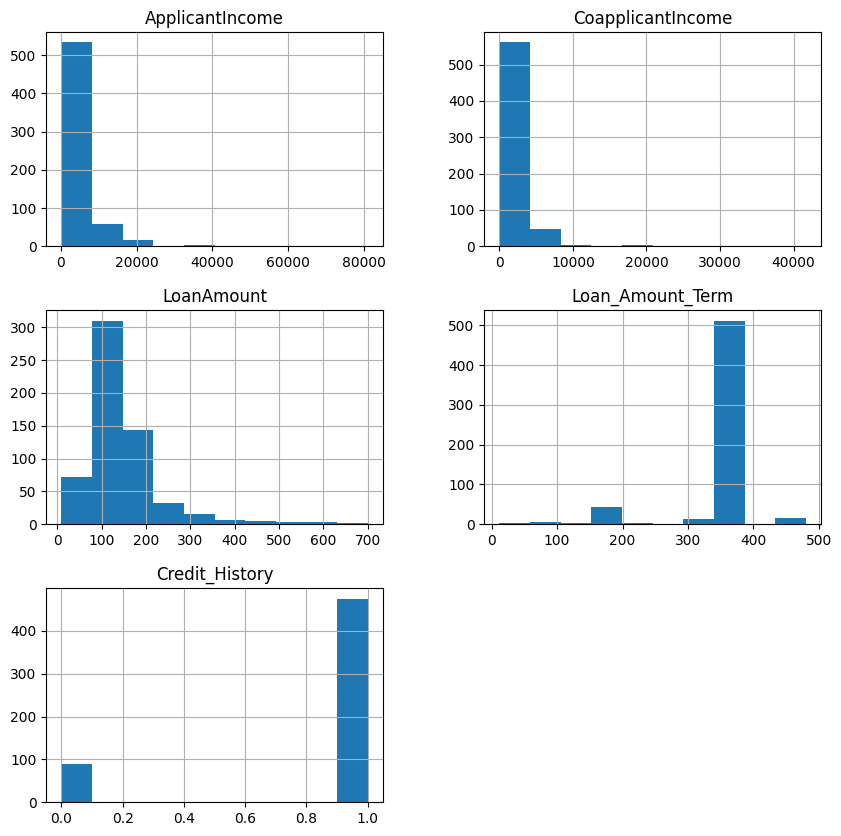

In [10]:

df.hist(figsize=(10,10))
plt.show()

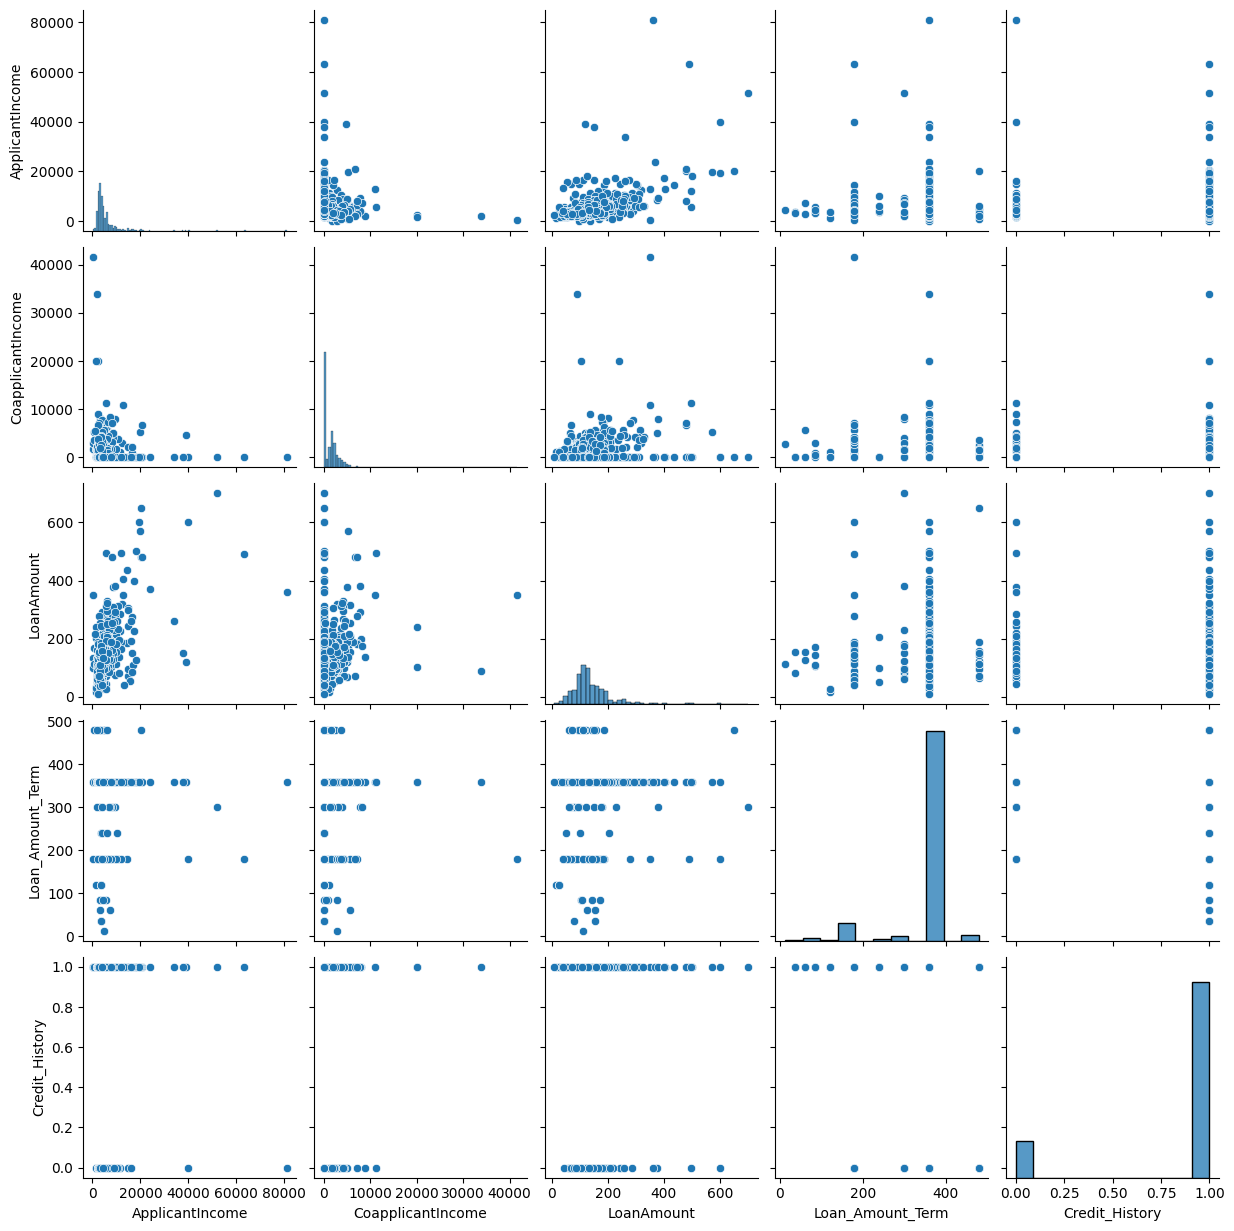

In [11]:

sns.pairplot(df)

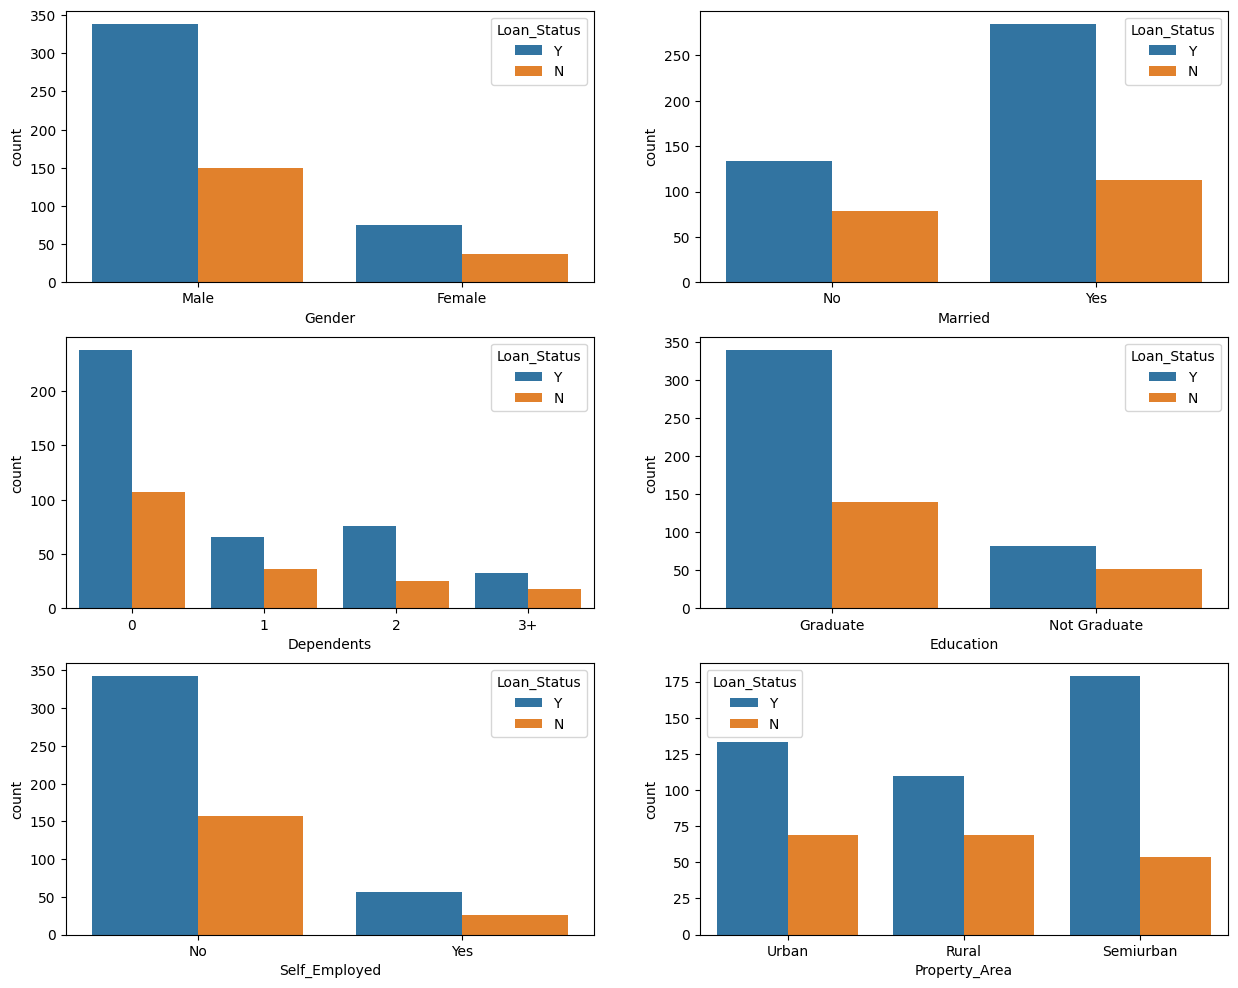

In [12]:

#doing countplot for each categorical column with hue as Loan_status using subplots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

axes = axes.flatten()

for i, col in enumerate(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']):
  sns.countplot(data=df, x=col, hue='Loan_Status', ax=axes[i])

#sns.countplot(data=df, x='Gender', hue='Loan_Status')
#plt.show()

### Data preprocessing

In [13]:
# @title
df_copy = df.copy()

,0
ApplicantIncome,"Axes(0.125,0.53;0.352273x0.35)"
CoapplicantIncome,"Axes(0.547727,0.53;0.352273x0.35)"
LoanAmount,"Axes(0.125,0.11;0.352273x0.35)"


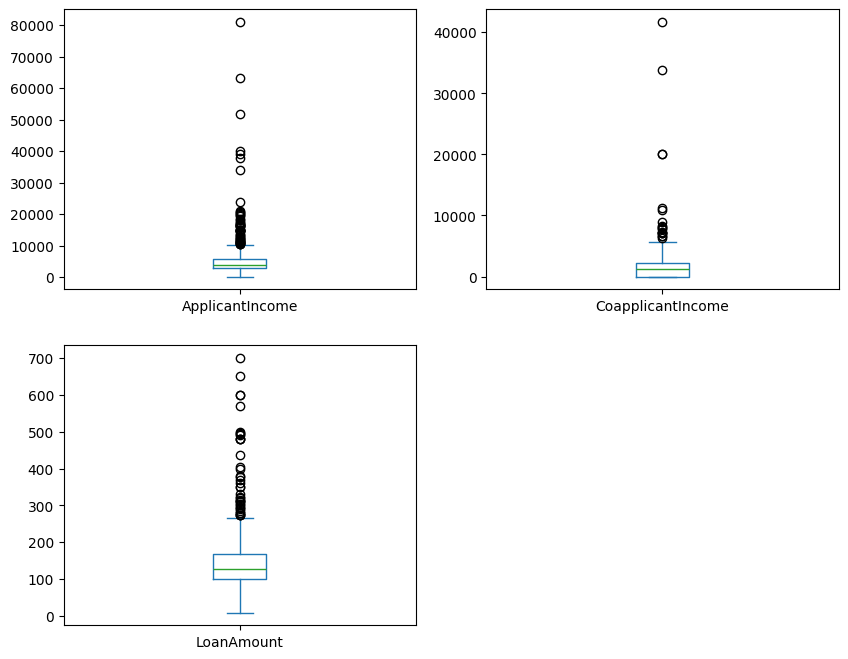

In [14]:
# @title
df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 8))

In [15]:
# @title
#removing outliers through IQR

cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in cols:
  Q1 = df_copy[col].quantile(0.25)
  Q3 = df_copy[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

In [16]:
# @title
#imputing Loan_Amount
df_copy['LoanAmount'] = df_copy['LoanAmount'].fillna(df_copy['LoanAmount'].median())

In [17]:
# @title
# - Columns - Gneder , Married , Dependents, Self-Employed, Loan_Amount_Term, Credit_History - these categorical columns are filled with mode

for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

# for the values that coount for 3+ replacing it with 3 is the best approach since its ordinal data
# missing filling values with mode, 2.4% missing data, categorical
df_copy['Dependents'] = df_copy['Dependents'].replace('3+', '3')
#convert to integer
df_copy['Dependents'] = pd.to_numeric(df_copy['Dependents'] , errors='coerce').astype('Int64')

In [18]:
# @title
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
categorical_cols_label_encode = ['Loan_Status', 'Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through the categorical columns and apply LabelEncoder
for col in categorical_cols_label_encode:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])


# --- One-Hot Encoding for 'Loan_Amount_Term' ---
df_copy = pd.get_dummies(df_copy, columns=['Loan_Amount_Term'], drop_first=True, dtype=int)



In [20]:
# @title
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,...,Loan_Status,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,1.0,...,1,0,0,0,0,0,0,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,1.0,...,1,0,0,0,0,0,0,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,1.0,...,1,0,0,0,0,0,0,0,1,0
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,1.0,...,1,0,0,0,0,0,0,0,1,0


In [21]:
# @title
#drooping Loan_ID column

df_copy.drop('Loan_ID', axis=1, inplace=True)

# Splitting the data

In [22]:
# @title
#splitting the data

from sklearn.model_selection import train_test_split

X = df_copy.drop('Loan_Status', axis=1)
y = df_copy['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Model Selection

# Ensemble learning

Ensemble learning, in essence, is like a wisdom-of-the-crowd approach in machine learning. Instead of relying on a single model, it trains multiple individual models (often called base learners) and strategically combines their predictions. This aggregation of diverse perspectives typically leads to a more robust and accurate overall prediction than any of the constituent models could achieve alone. By harnessing the strengths and compensating for the weaknesses of individual learners, ensembles aim to improve generalization and reduce the risk of overfitting.

 - Given their wide use, we can refer to them as “standard” ensemble learning strategies; they are:

  - Bagging.
  - Stacking.
  - Boosting.

##### note : some functions that i made to do cross validation and to calculate other metrics

In [23]:
# @title
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#helper function for further metric claculation
def evaluate_model(y_test, y_pred):
  print("Accuracy" , accuracy_score(y_test, y_pred))
  print("classification report", classification_report(y_test, y_pred))
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion matrix')
  plt.show()

In [24]:
# @title
from sklearn.model_selection import cross_val_score

def cross_validation(model_pipeline):
  scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')

  print(f"Cross-validated accuracy: {scores.mean():.4f}")
  print(f"Standard deviation: {scores.std():.4f}")


# Bagging

**Bagging** is a technique in which numerous instances of the same base model are trained on distinct portions of the training data. The subsets are generated via bootstrapping, which involves randomly selecting the training data with replacement. Each base model is trained on its own bootstrapped subset of data. The underlying models’ forecasts are then integrated using a voting or averaging procedure to produce the final prediction.

## Random Forest

**Random Forest** is essentially a bagging technique applied to decision trees, with an added step of random feature selection at each split. This extra randomness is what distinguishes it from a simple bagged ensemble of decision trees and often makes it more effective.

Accuracy 0.8217821782178217
classification report               precision    recall  f1-score   support

           0       0.83      0.50      0.62        30
           1       0.82      0.96      0.88        71

    accuracy                           0.82       101
   macro avg       0.83      0.73      0.75       101
weighted avg       0.82      0.82      0.81       101

Confusion Matrix


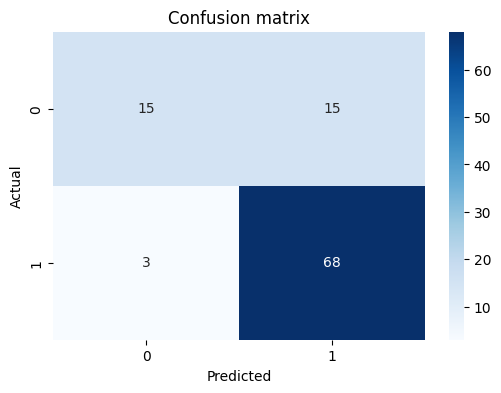

In [25]:
# @title
# first method : Bagging
# 1. Random Forest - ()

# using column transformer and pipelines

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#make a pipeline with random forest
pipeline_rf = Pipeline([
    ('randomforest', RandomForestClassifier(random_state=42))
])

#fit the pipeline to data
pipeline_rf.fit(X_train, y_train)

# Perform cross-validation
evaluate_model(y_test, pipeline_rf.predict(X_test))

In [26]:
# @title
cross_validation(pipeline_rf)

Cross-validated accuracy: 0.8148
Standard deviation: 0.0288


## BaggingClassifier

The **BaggingClassifier** is an ensemble learning method in scikit-learn that implements the bagging (Bootstrap Aggregating) technique for classification. It's a versatile meta-estimator that can apply to almost any base classifier.

Accuracy 0.801980198019802
classification report               precision    recall  f1-score   support

           0       0.69      0.60      0.64        30
           1       0.84      0.89      0.86        71

    accuracy                           0.80       101
   macro avg       0.77      0.74      0.75       101
weighted avg       0.80      0.80      0.80       101

Confusion Matrix


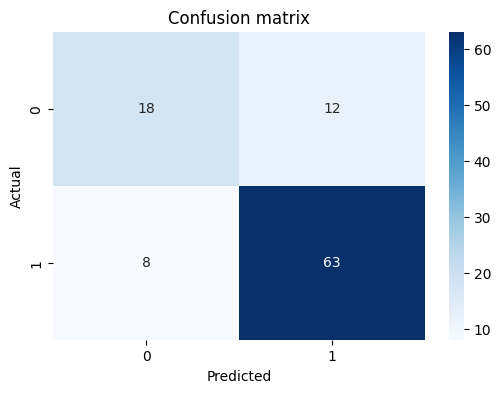

In [27]:
# @title
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier with 10 base model
# and into the pipeline it goes
pipeline_bg = Pipeline([
    ('baggingClassifier', BaggingClassifier(base_model, n_estimators=100, random_state=42))
])

pipeline_bg.fit(X_train, y_train)

# Make predictions on the test data
evaluate_model(y_test, pipeline_bg.predict(X_test))

In [28]:
# @title
cross_validation(pipeline_bg)

Cross-validated accuracy: 0.8069
Standard deviation: 0.0176


## Boosting

**AdaBoost (Adaptive Boosting)**: It sequentially trains weak learners, with each new learner focusing on the mistakes of the previous ones by adjusting the weights of misclassified data points. It also assigns weights to each learner based on its performance, giving more influence to accurate ones.

Accuracy 0.8316831683168316
classification report               precision    recall  f1-score   support

           0       0.88      0.50      0.64        30
           1       0.82      0.97      0.89        71

    accuracy                           0.83       101
   macro avg       0.85      0.74      0.76       101
weighted avg       0.84      0.83      0.82       101

Confusion Matrix


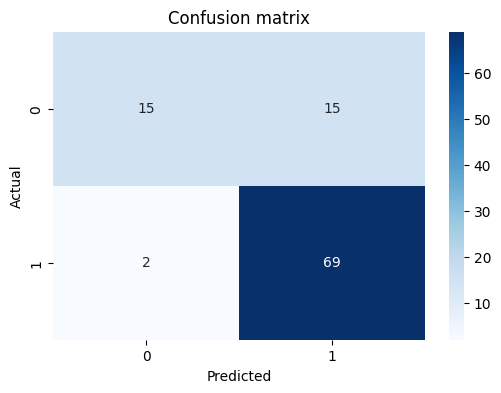

In [29]:
# @title
from sklearn.ensemble import AdaBoostClassifier

#adaboost
pipeline_ada = Pipeline([
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.05))
    ])

pipeline_ada.fit(X_train, y_train)

evaluate_model(y_test, pipeline_ada.predict(X_test))

In [30]:
# @title
cross_validation(pipeline_ada)

Cross-validated accuracy: 0.8308
Standard deviation: 0.0311


**Gradient Boosting**: This method also trains weak learners sequentially, but instead of adjusting data point weights, each new learner tries to predict the residual errors made by the previous ensemble. The predictions are then added to the ensemble, iteratively reducing the overall error.

Accuracy 0.8415841584158416
classification report               precision    recall  f1-score   support

           0       0.94      0.50      0.65        30
           1       0.82      0.99      0.90        71

    accuracy                           0.84       101
   macro avg       0.88      0.74      0.77       101
weighted avg       0.86      0.84      0.82       101

Confusion Matrix


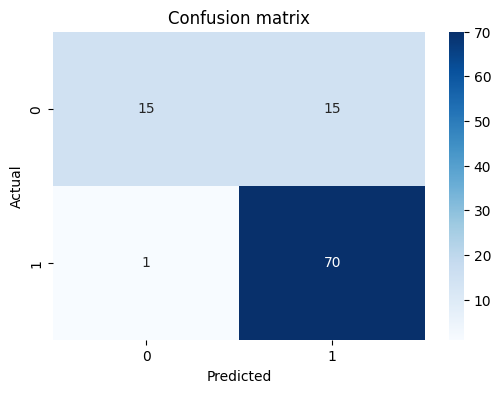

In [31]:

from sklearn.ensemble import GradientBoostingClassifier

# Create the pipeline
pipeline_gb = Pipeline([
    ('gradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.05))
    ])

pipeline_gb.fit(X_train, y_train)

# Accuracy
evaluate_model(y_test, pipeline_gb.predict(X_test))

In [32]:

cross_validation(pipeline_gb)

Cross-validated accuracy: 0.8209
Standard deviation: 0.0319


XGBoost (Extreme Gradient Boosting): An optimized and highly efficient implementation of gradient boosting that incorporates regularization (L1 and L2), handles sparse data effectively, and utilizes parallel processing for faster training. It's known for its high performance and speed.

Accuracy 0.8415841584158416
classification report               precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.83      0.97      0.90        71

    accuracy                           0.84       101
   macro avg       0.86      0.75      0.78       101
weighted avg       0.85      0.84      0.83       101

Confusion Matrix


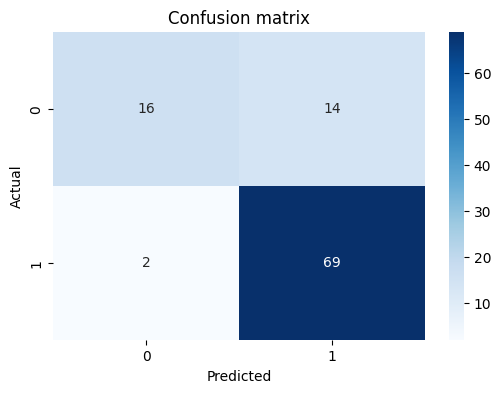

In [33]:

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0)

pipeline_xgb = Pipeline([
    ('xgbclassifier', XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0))
    ])

#fit the pipeline
pipeline_xgb.fit(X_train, y_train)

evaluate_model(y_test, pipeline_xgb.predict(X_test))

In [34]:

cross_validation(pipeline_xgb)

Cross-validated accuracy: 0.8288
Standard deviation: 0.0288


**LightGBM (Light Gradient Boosting Machine)**: Another fast and efficient gradient boosting framework, particularly effective on large datasets. It employs techniques like Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB) to accelerate training while often achieving comparable or better accuracy than other boosting methods.

Accuracy 0.801980198019802
classification report               precision    recall  f1-score   support

           0       0.73      0.53      0.62        30
           1       0.82      0.92      0.87        71

    accuracy                           0.80       101
   macro avg       0.78      0.72      0.74       101
weighted avg       0.79      0.80      0.79       101

Confusion Matrix


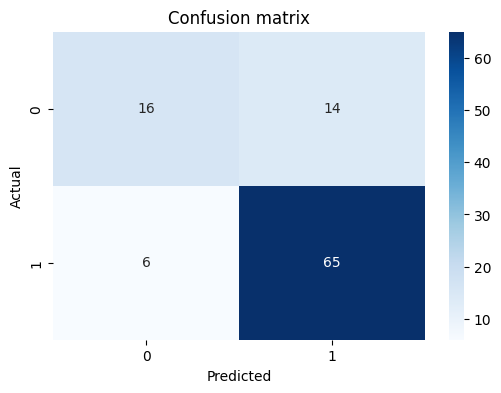

In [42]:

#implementing lightbgm

from lightgbm import LGBMClassifier

#initializing model into pipeline
pipeline_lgbm = Pipeline([
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=0, learning_rate=0.05, verbose=-1))
    ])

pipeline_lgbm.fit(X_train, y_train)

evaluate_model(y_test, pipeline_lgbm.predict(X_test))

# Stacking

It's an ensemble technique that combines the predictions of multiple diverse base models by training a new "meta-learner" on these predictions to produce the final output. Think of it as learning the best way to weigh the outputs of different models.

Accuracy 0.8316831683168316
classification report               precision    recall  f1-score   support

           0       0.88      0.50      0.64        30
           1       0.82      0.97      0.89        71

    accuracy                           0.83       101
   macro avg       0.85      0.74      0.76       101
weighted avg       0.84      0.83      0.82       101

Confusion Matrix


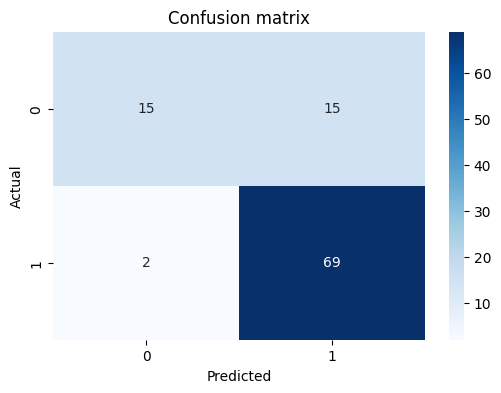

In [36]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Base learners
estimators = [
    ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.05))
]

# Meta model (can also be scaled if needed)
final_estimator = LogisticRegression()

#stacking the model
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

stacked_model.fit(X_train, y_train)

evaluate_model(y_test, stacked_model.predict(X_test))

In [43]:
cross_validation(stacked_model)

Cross-validated accuracy: 0.8208
Standard deviation: 0.0295


#Conclusion

Boosting methods, particularly AdaBoost and XGBoost, demonstrated superior performance on this classification task. While bagging approaches like Random Forest and BaggingClassifier provide stability and robustness, boosting appears to better capture the nuances of the data. Stacking offers a promising middle ground by leveraging multiple models but may require further tuning of base learners and meta-models for optimal results.

